**Árboles de Decisión**

In [2]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("./winequality-red.csv")
data.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#revisamos que no hayan valores nulos
data.isna().sum()

acidez_fija                0
acidez_volatil             0
acido_citrico              0
azucar_residual            0
cloruros                   0
dioxido_de_azufre_libre    0
dioxido_de_azufre_total    0
densidad                   0
pH                         0
sulfatos                   0
alcohol                    0
calidad                    0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

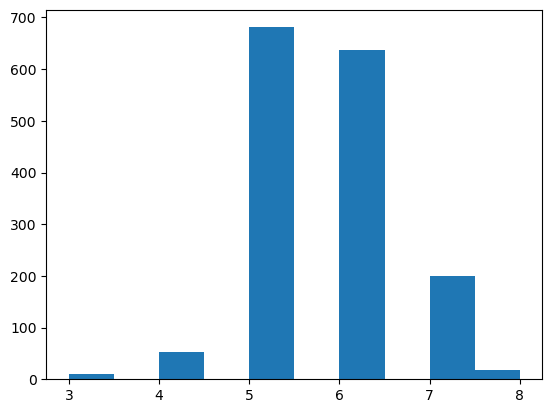

In [10]:
#podemos ver cuantos vinos hay de cada calidad
plt.hist(data.calidad)

<Axes: xlabel='acidez_fija', ylabel='acidez_volatil'>

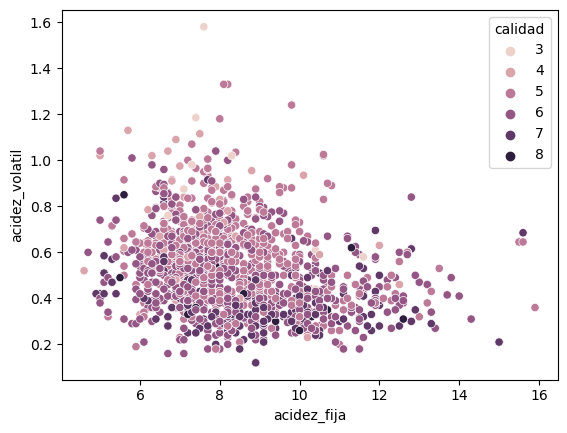

In [12]:
#tenemos la cidez fija contra contra la acidez volatil
sns.scatterplot(x = "acidez_fija", y = "acidez_volatil", hue = "calidad", data = data)

In [14]:
#columnas analizar
predictors_col = ["acidez_fija", "acidez_volatil", "acido_citrico","azucar_residual", "cloruros", "dioxido_de_azufre_libre", "dioxido_de_azufre_total", "densidad", "pH", "sulfatos", "alcohol"]
target_col = ['calidad']

In [15]:
predictors = data[predictors_col]
target = data[target_col]

In [16]:
predictors

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [19]:
#aca tenemos de que calidad es el vino, por ejemplo el vino con id 3 es de calidad 6
target

,calidad
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [21]:
#los valores cercanos a 1 tienen una alta correlacion directa y los cercanos a -1 indican una alta correlacion inversa, cercanos a 0 indican que o hay correlacion o hay una muy baja correlacion
corr = predictors.corr()
corr

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol
acidez_fija,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
acidez_volatil,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
acido_citrico,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
azucar_residual,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
cloruros,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
dioxido_de_azufre_libre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
dioxido_de_azufre_total,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
densidad,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulfatos,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


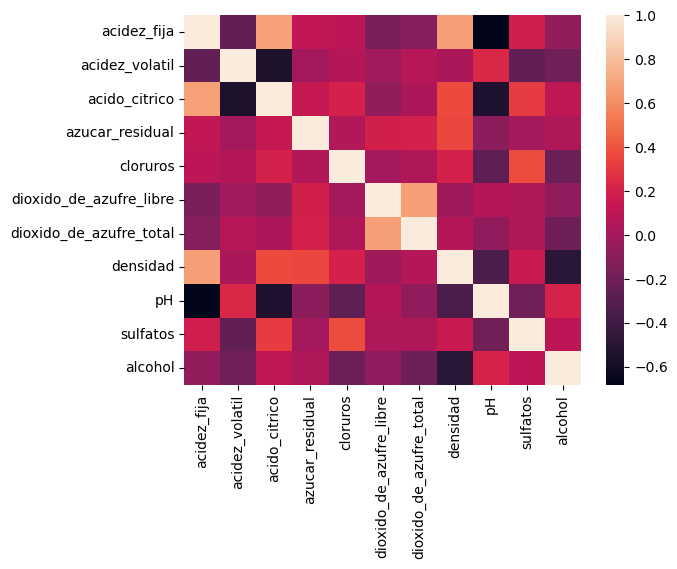

In [22]:
#mapa de calor, cuando es 1 tiene mas correlacion y cuando es -1 tiene menos correlacion y la grafica va oscureciendo
sns.heatmap(corr)
plt.show()

In [45]:
#dividimos el dataset en los de prueba y de test, con una proporcion 80% y 20%
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [46]:
#se crea el arbol de decicion
tree = DecisionTreeClassifier()

In [47]:
#aca lo voy a empezar a entrenar
arbol = tree.fit(X_train, y_train)

[Text(0.5106199781135696, 0.9772727272727273, 'x[10] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9, 45, 535, 514, 164, 12]'),
 Text(0.23304551178269473, 0.9318181818181818, 'x[9] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.041134496612100495, 0.8863636363636364, 'x[1] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.01535048270072555, 0.8409090909090909, 'x[4] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.011512862025544163, 0.7954545454545454, 'x[4] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.007675241350362775, 0.75, 'x[5] <= 35.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.0038376206751813877, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.011512862025544163, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.01535048270072555, 0.75, 'gini = 0.0\nsamples = 6\

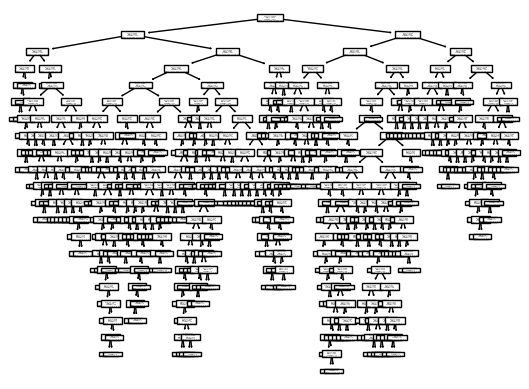

In [48]:
#ahora vamos a ver nuestro arbol
plot_tree(arbol)

In [49]:
predicciones = arbol.predict(X_test)

In [50]:
# vamos hacer las predicciones
predicciones

array([7, 7, 5, 5, 6, 5, 5, 8, 6, 7, 5, 6, 5, 6, 7, 5, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 7,
       6, 7, 5, 5, 6, 5, 5, 6, 4, 5, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 7, 5,
       7, 5, 6, 6, 8, 7, 7, 6, 5, 6, 6, 6, 5, 7, 6, 5, 7, 6, 6, 6, 5, 7,
       7, 7, 6, 6, 5, 5, 6, 7, 5, 5, 7, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 3, 6, 6, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 4, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 8, 5, 6, 6, 7, 5, 5, 5, 6, 7,
       4, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5,

In [51]:
# Examinamos la matriz de confusión
#ahi podemos ver el margen de error
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,2,4,1,1,0
5,1,2,104,33,6,0
6,0,4,32,72,12,4
7,0,0,3,13,19,0
8,0,0,2,2,2,0


In [52]:
accuracy = accuracy_score(y_test,predicciones)
accuracy
#aca podemos ver la exactitud del modelo y podemos ver que el puede mejorar para que aumente mejor las predicciones

0.615625